
#**CS 65W: Data Analysis with Python**
##Most Streamed Spotify Songs 2023 Data Analysis
###**Author**: Erick Isaac Lascano Otañez

Dataset courtesy of: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data


#Introduction
Embarking on a six-week data exploration journey, I wanted to analyze the Top Spotify Songs of 2023 dataset sourced from Kaggle, available in CSV format for seamless compatibility with pandas.
My primary objective was to uncover  patterns and insights within the most streamed songs available in the data set, analyzing audio features and popularity metrics.
The first activity was dedicated to meticulous data cleaning, addressing challenges of null data. Then it was done an exploratory data analysis, unraveling intricate patterns, correlations and relationships within the dataset.
Later on, I used seaborn and matplotlib for insightful visualizations, particularly in plotting the respective boxplots and histograms for the different data features to provide descriptive statistical representations of them.
During the fifth week I witnessed the application of machine learning techniques, employing PCA and clustering to spot underlying structures in the data.

Finally, the conclusive sixth week was dedicated to synthesizing findings and drafting a comprehensive conclusion for the analyzed work.
Throughout this journey, the goal remained to unravel the richness of musical attributes the Spotify DataSet.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster import hierarchy
from sklearn import cluster, preprocessing, decomposition
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Analysis with Python/spotify-2023.csv", encoding='latin1')

# EDA

##Most Streamed Spotify Songs Data Frame

In [ ]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


## Looking at the data types of your columns

In [ ]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

##Looking at the columns that are missing data


In [ ]:
df.isna()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Check if any missing values are missing
df.isna().any()

track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
bpm                     False
key                      True
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

In [ ]:
df.isna().sum() # Count missing data

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [ ]:
#percentange of missing data
df.isna().mean().mul(100)

track_name              0.00000
artist(s)_name          0.00000
artist_count            0.00000
released_year           0.00000
released_month          0.00000
released_day            0.00000
in_spotify_playlists    0.00000
in_spotify_charts       0.00000
streams                 0.00000
in_apple_playlists      0.00000
in_apple_charts         0.00000
in_deezer_playlists     0.00000
in_deezer_charts        0.00000
in_shazam_charts        5.24659
bpm                     0.00000
key                     9.96852
mode                    0.00000
danceability_%          0.00000
valence_%               0.00000
energy_%                0.00000
acousticness_%          0.00000
instrumentalness_%      0.00000
liveness_%              0.00000
speechiness_%           0.00000
dtype: float64

##Looking at the value counts for categorical columns.
###If these columns can be numeric columns, convert them to numbers. If they are categorical columns I could limit the unique values


In [ ]:
#categorical columns: 'in_spotify_charts','in_apple_charts','in_deezer_charts','in_shazam_charts','key','mode'
df['in_spotify_charts'].value_counts().head(10)

0     405
4      48
2      42
6      36
3      18
8      17
5      17
1      16
13     16
12     16
Name: in_spotify_charts, dtype: int64

In [ ]:
df['in_apple_charts'].value_counts().head(10)

0     100
1      40
2      26
3      24
6      16
5      15
21     14
9      13
10     13
15     13
Name: in_apple_charts, dtype: int64

In [ ]:
df['in_deezer_charts'].value_counts().head(10)

0     558
1     137
2      48
3      31
5      18
6      18
4      18
9      14
11     11
14     11
Name: in_deezer_charts, dtype: int64

In [ ]:
df['in_shazam_charts'].value_counts().head(10)

0     344
1      73
2      35
3      21
4      19
5      15
6      12
9      11
10     11
7      10
Name: in_shazam_charts, dtype: int64

In [ ]:
df['key'].value_counts()

C#    120
G      96
G#     91
F      89
B      81
D      81
A      75
F#     73
E      62
A#     57
D#     33
Name: key, dtype: int64

In [ ]:
df['mode'].value_counts()

Major    550
Minor    403
Name: mode, dtype: int64

##Determining  how to handle the missing values for your dataset


In [ ]:
df.key

0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 953, dtype: object

In [ ]:
df.key.isna().any()

True

In [ ]:
df.key.dropna()

0       B
1      C#
2       F
3       A
4       A
       ..
948     A
949    F#
950    C#
951    C#
952     E
Name: key, Length: 858, dtype: object

In [ ]:
df['in_shazam_charts']

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 953, dtype: object

In [ ]:
# Checking for missing values in the column
df['in_shazam_charts'].isna().any()

True

In [ ]:
#Removing rows were there are missing values
df['in_shazam_charts'].dropna()

0      826
1      382
2      949
3      548
4      425
      ... 
948      0
949      0
950      0
951      0
952      0
Name: in_shazam_charts, Length: 903, dtype: object

##Creating a function that accepts the raw data after it has been loaded and returns the cleaned-up data

In [ ]:
def clean_data(raw_data):
    # Handle missing values by removing NAN values

    # 'key' and 'in_shazam_charts' are columns that need to be cleaned
    cleaned_data = raw_data.dropna(subset=['key', 'in_shazam_charts'])

    return cleaned_data


##Data frame without missing values

In [ ]:
new_df = clean_data(df)

In [ ]:
new_df.isna().any()

track_name              False
artist(s)_name          False
artist_count            False
released_year           False
released_month          False
released_day            False
in_spotify_playlists    False
in_spotify_charts       False
streams                 False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts        False
bpm                     False
key                     False
mode                    False
danceability_%          False
valence_%               False
energy_%                False
acousticness_%          False
instrumentalness_%      False
liveness_%              False
speechiness_%           False
dtype: bool

##What are the most common categorical values?  

In [ ]:
new_df.key.value_counts() #The most frequent key of songs is in C#.

C#    115
G      91
F      87
G#     85
D      78
B      77
A      71
F#     69
E      59
A#     55
D#     30
Name: key, dtype: int64

<Axes: >

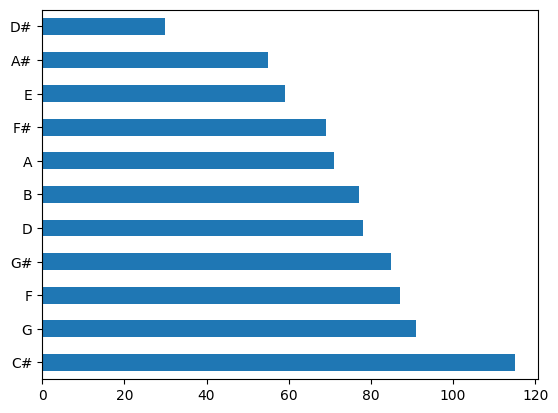

In [ ]:
new_df.key.value_counts().plot.barh()

In [ ]:
new_df['mode'].value_counts() #The most frequent mode of songs is the major tone.

Major    452
Minor    365
Name: mode, dtype: int64

<Axes: >

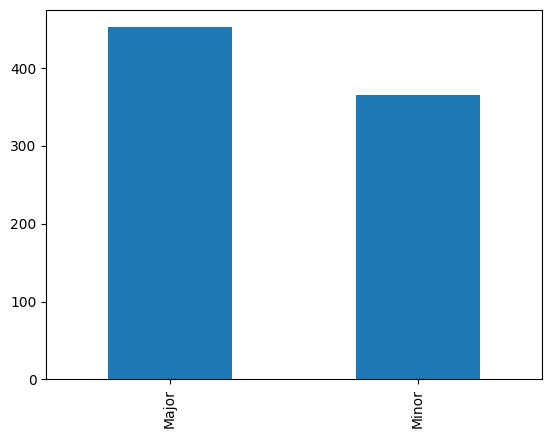

In [ ]:
new_df['mode'].value_counts().plot.bar()

In [ ]:
new_df.released_year.value_counts() #The majority of songs released fall into the year 2022

2022    359
2023    159
2021     95
2019     27
2020     23
2017     19
2016     17
2014     12
2013     10
2018      9
2015      9
2011      9
2002      6
2012      6
2010      6
1999      5
1963      3
2000      3
2004      3
1985      2
2003      2
1958      2
1970      2
1959      2
2008      2
1991      2
1984      2
1982      2
1986      2
1942      1
1957      1
1995      1
1996      1
2005      1
1998      1
1946      1
1950      1
1979      1
1971      1
1930      1
1973      1
1997      1
1975      1
1992      1
1983      1
1987      1
Name: released_year, dtype: int64

<Axes: >

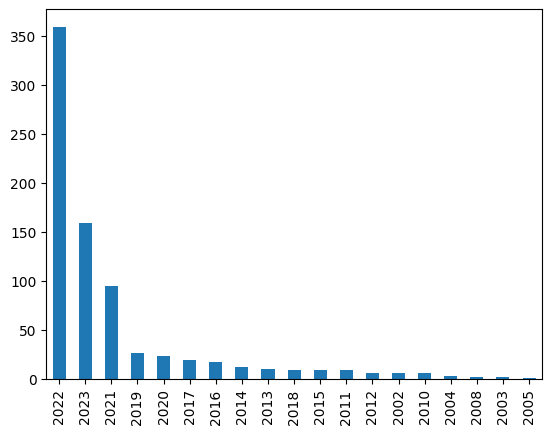

In [ ]:
(new_df.query('released_year > 2000') #Below the year 2000, there are few songs released in the dataset.
.released_year
.value_counts()
.plot.bar())

In [ ]:
new_df.released_month.value_counts() #Most songs are released in May and January.

5     114
1     113
3      73
6      73
12     68
11     66
4      63
10     63
2      53
7      47
9      46
8      38
Name: released_month, dtype: int64

<Axes: >

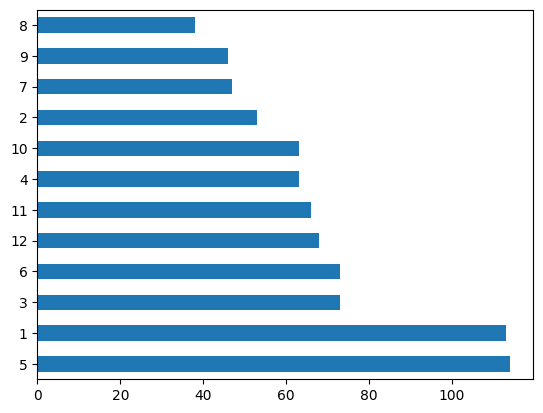

In [ ]:
new_df.released_month.value_counts().plot.barh() #may and january are the most common released months for songs in spotify.

<Axes: >

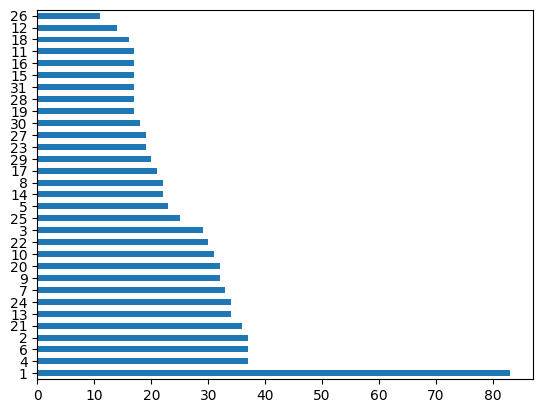

In [ ]:
new_df.released_day.value_counts().plot.barh() #the 1st of each month is the most common released day.

In [ ]:
new_df['artist(s)_name'].value_counts().sample(20) #A random count of the artist in the dataset

Ayparia, unxbected                                1
Zion & Lennox                                     1
MC Caverinha, KayBlack                            1
Imagine Dragons                                   3
Latto, Jung Kook                                  1
Chase Atlantic                                    1
The Neighbourhood                                 2
Radiohead                                         1
Keane                                             1
Quevedo                                           3
Julieta Venegas, Bad Bunny, Tainy                 1
Dean Martin                                       1
Nirvana                                           2
Bad Bunny                                        16
Bizarrap, Villano Antillano                       1
Central Cee                                       2
Billie Eilish, Khalid                             1
Marï¿½ï¿½lia Mendonï¿½ï¿½a, George Henrique &     1
J Balvin, Nio Garcia, Bad Bunny                   1
SALES       

 ## Is Taylor Swift is the most frequent streamed artist?



In [ ]:
(new_df['artist(s)_name']
 .value_counts()
 .loc[["Taylor Swift","Bad Bunny","Kanye West","Justin Bieber","Guns N' Roses","Eminem","Lil Uzi Vert","Dua Lipa","Shakira","Juice WRLD","Metallica"]])

Taylor Swift     29
Bad Bunny        16
Kanye West        3
Justin Bieber     2
Guns N' Roses     1
Eminem            4
Lil Uzi Vert      1
Dua Lipa          3
Shakira           1
Juice WRLD        2
Metallica         1
Name: artist(s)_name, dtype: int64

<Axes: >

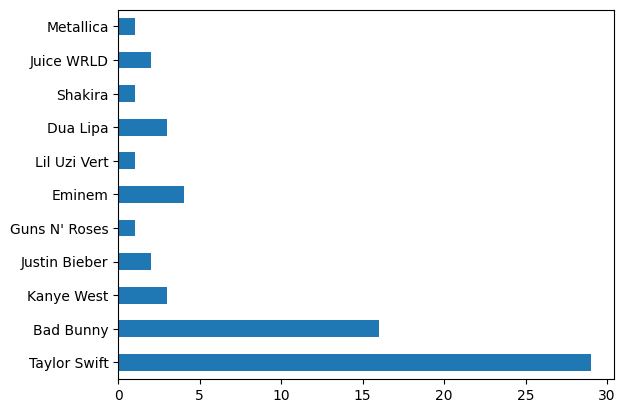

In [ ]:
(new_df['artist(s)_name']
 .value_counts()
 .loc[["Taylor Swift","Bad Bunny","Kanye West","Justin Bieber","Guns N' Roses","Eminem","Lil Uzi Vert","Dua Lipa","Shakira","Juice WRLD","Metallica"]]
 .plot
 .barh())

##What are the limits for continuous data? Are there outliers?

In [ ]:
new_df['danceability_%'].describe()

count    817.000000
mean      67.391677
std       14.688458
min       23.000000
25%       57.000000
50%       70.000000
75%       79.000000
max       96.000000
Name: danceability_%, dtype: float64

<Axes: ylabel='Frequency'>

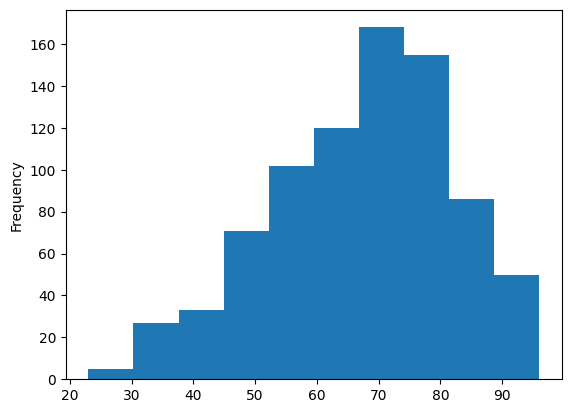

In [ ]:
new_df['danceability_%'].plot.hist()

<Axes: >

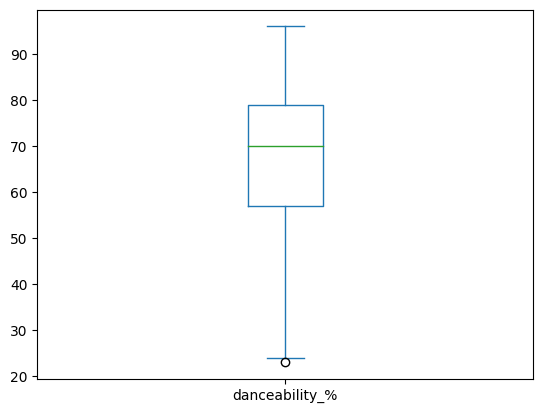

In [ ]:
new_df['danceability_%'].plot.box()

In [ ]:
new_df['energy_%'].describe()

count    817.000000
mean      64.362301
std       16.107587
min       14.000000
25%       53.000000
50%       66.000000
75%       76.000000
max       97.000000
Name: energy_%, dtype: float64

<Axes: ylabel='Frequency'>

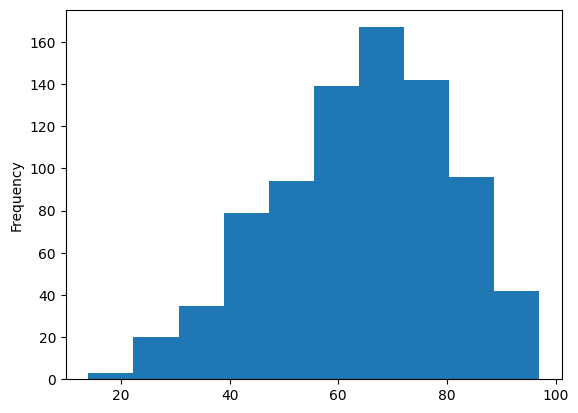

In [ ]:
new_df['energy_%'].plot.hist()

##Is there an example of an outlier in your data that surprised me?
When plotting a boxplot of the 'energy_%' column, there are songs with almost 0 percent of energy, and others that have almost 100 percent of energy. Considering that the mean is 64.36%, this distribution suggests a wide range of energy levels in the dataset.

The histogram of the 'energy_%' column illustrates the distribution of energy percentages across 817 songs. The majority of songs fall within the 50% to 75% range, indicating a relatively high energy level. However, there is a noticeable spread in energy levels, with some songs having as low as 14% energy and others reaching up to 97%. This variety suggests a diverse range of energetic qualities among the songs in the spotify dataset, providing insights into the overall dynamics of the music at this platform.




<Axes: >

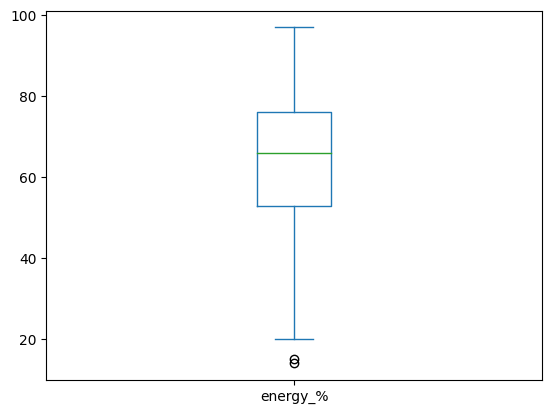

In [ ]:
new_df['energy_%'].plot.box()

In [ ]:
new_df['bpm'].describe()

count    817.000000
mean     122.565483
std       28.174803
min       65.000000
25%       99.000000
50%      120.000000
75%      141.000000
max      206.000000
Name: bpm, dtype: float64

<Axes: >

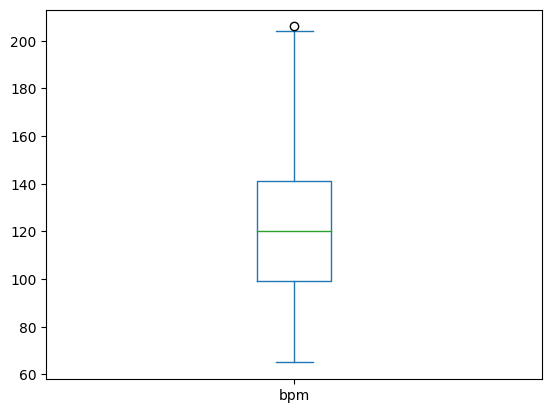

In [ ]:
new_df['bpm'].plot.box()

In [ ]:
new_df['acousticness_%'].describe()

count    817.000000
mean      26.309670
std       25.470972
min        0.000000
25%        5.000000
50%       17.000000
75%       41.000000
max       97.000000
Name: acousticness_%, dtype: float64

<Axes: ylabel='Frequency'>

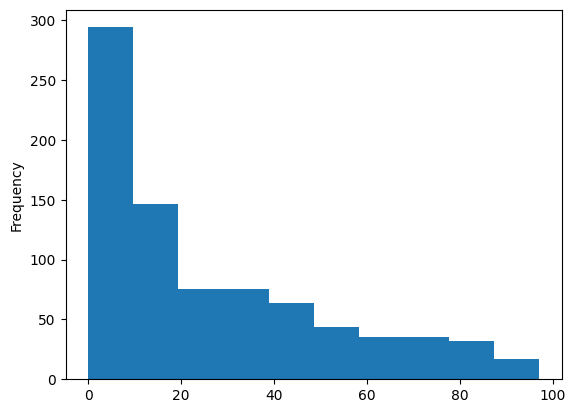

In [ ]:
new_df['acousticness_%'].plot.hist()

<Axes: >

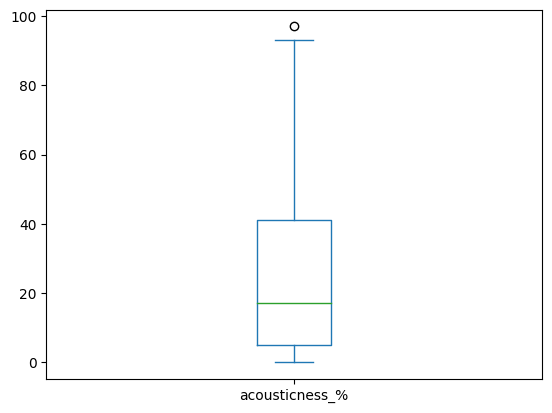

In [ ]:
new_df['acousticness_%'].plot.box()

In [ ]:
new_df.columns.values

array(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists',
       'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts',
       'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%',
       'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%',
       'liveness_%', 'speechiness_%'], dtype=object)

##What relationships do you find in your data?

In [ ]:
new_df['danceability_%'].corr(new_df['valence_%'])

0.38972864666412926

<Axes: xlabel='danceability_%', ylabel='valence_%'>

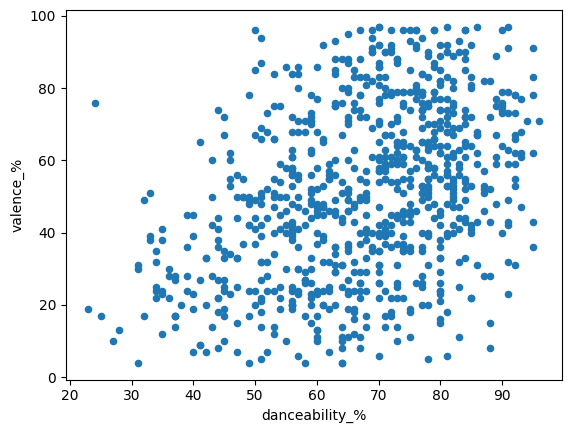

In [ ]:
new_df.plot.scatter(x='danceability_%', y='valence_%')

<Axes: xlabel='danceability_%', ylabel='valence_%'>

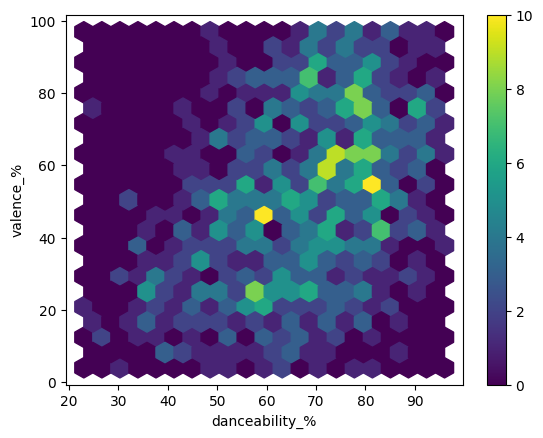

In [ ]:
new_df.plot.hexbin(x='danceability_%', y='valence_%',gridsize= 20,cmap='viridis')

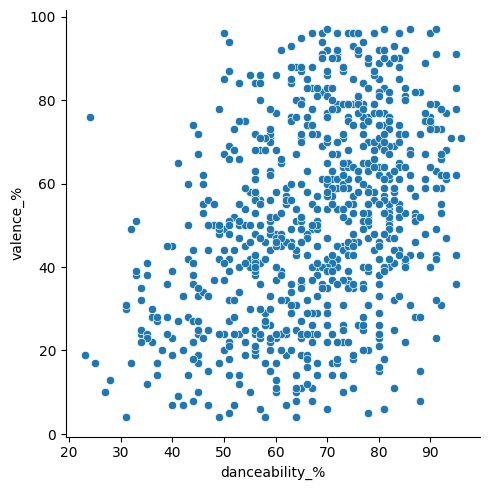

In [ ]:
sns.relplot(x='danceability_%', y='valence_%',data=new_df)

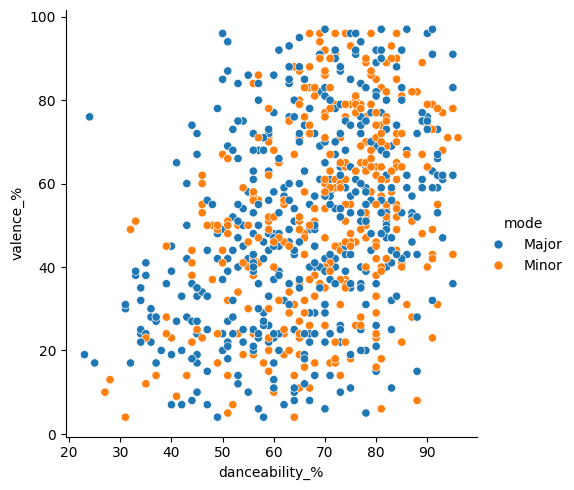

In [ ]:
sns.relplot(x='danceability_%', y='valence_%',data=new_df,hue='mode')

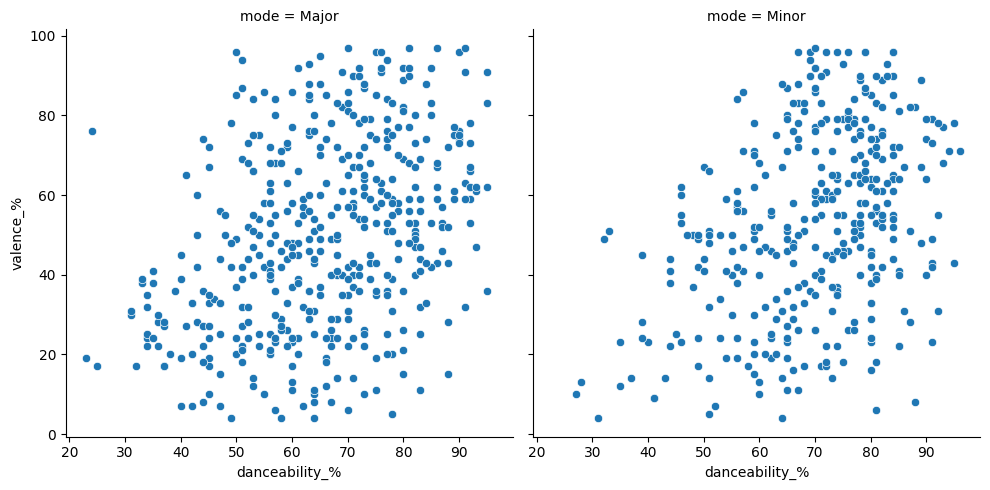

In [ ]:
sns.relplot(x='danceability_%', y='valence_%',data=new_df,col='mode',col_wrap=2,alpha=1)

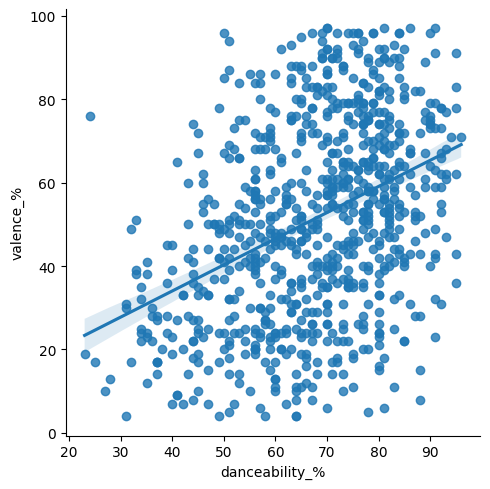

In [ ]:
sns.lmplot(x='danceability_%', y='valence_%',data=new_df)

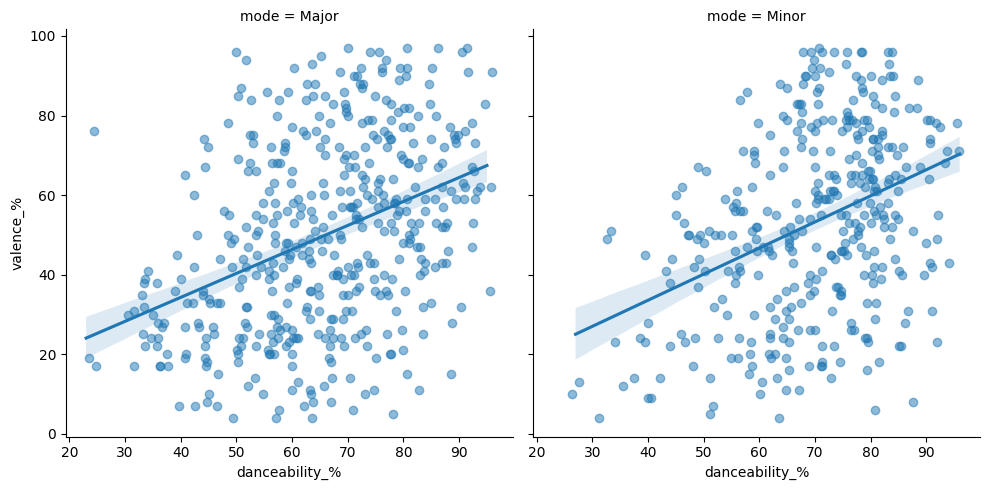

In [ ]:
sns.lmplot(x='danceability_%',y='valence_%',data=new_df,x_jitter=1,scatter_kws={'alpha':0.5},col="mode",col_wrap=2)

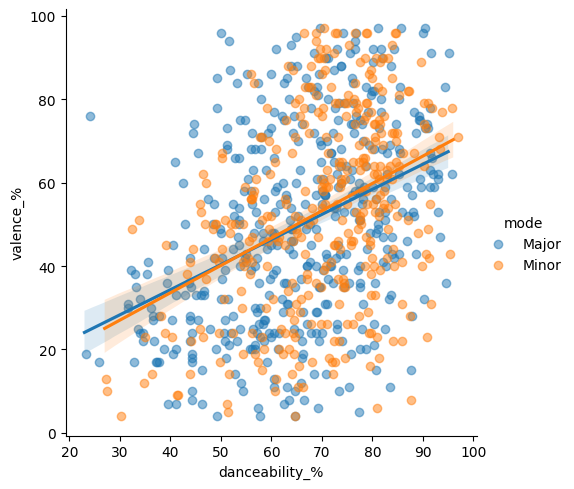

In [ ]:
sns.lmplot(x='danceability_%',y='valence_%',data=new_df,x_jitter=1,scatter_kws={'alpha':0.5},hue="mode")

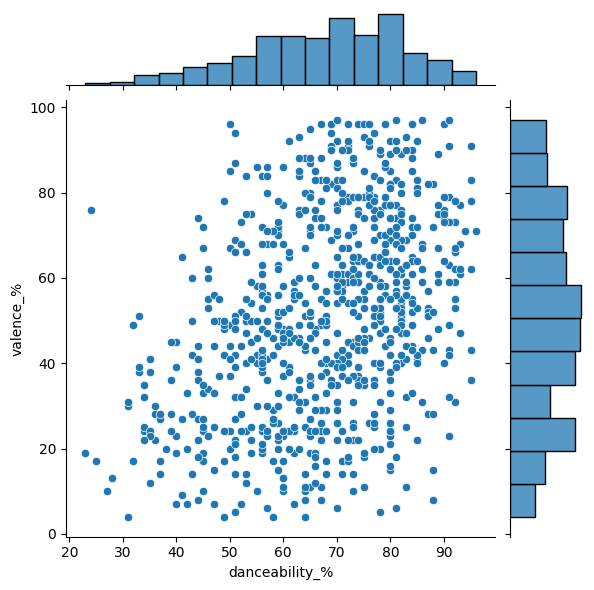

In [ ]:
sns.jointplot(x='danceability_%',y='valence_%',data=new_df)

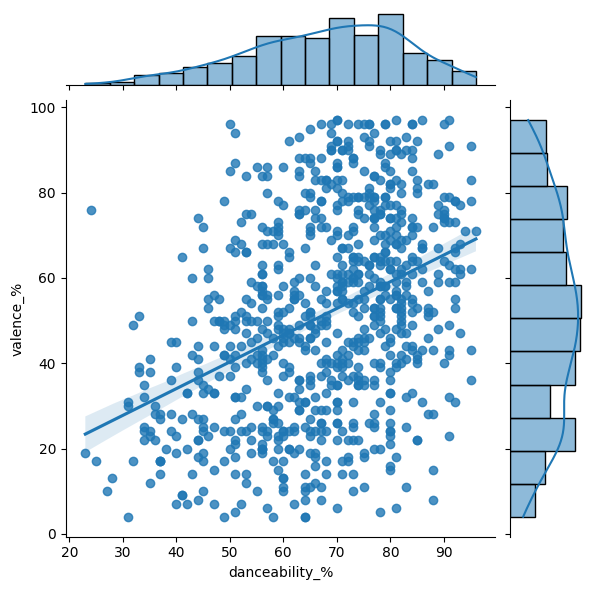

In [ ]:
sns.jointplot(x='danceability_%',y='valence_%',data=new_df,kind='reg')

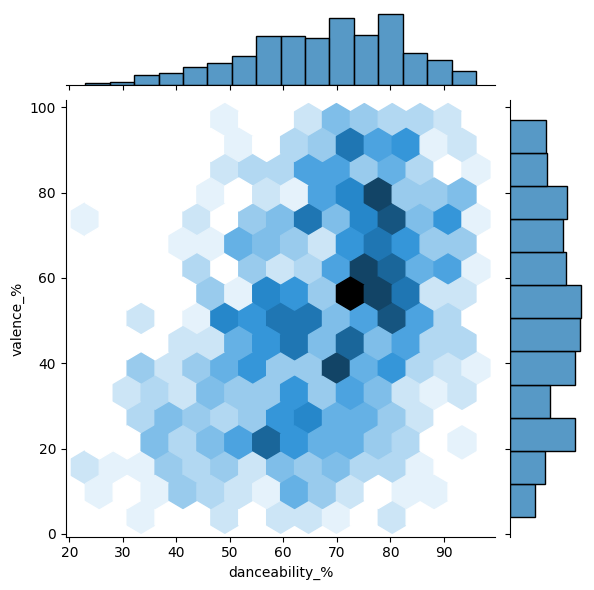

In [ ]:
sns.jointplot(x='danceability_%',y='valence_%',data=new_df,kind='hex')

##Exploring the Data Frame with just continous data


In [ ]:
 #Creating a data frame with just continous data
df_cont = new_df[['danceability_%', 'valence_%','energy_%','acousticness_%','instrumentalness_%','liveness_%','speechiness_%']]

In [ ]:
(df_cont
 .corr(method='spearman')
 #.style.background_gradient(cmap='rainbow')
  #.style.background_gradient(cmap='RdBu')
 #.style.background_gradient(cmap='viridis', vmin=-1, vmax=1)
 .style.background_gradient(cmap='RdBu', vmin=-1, vmax=1)
)

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
danceability_%,1.000000,0.381733,0.117167,-0.145585,-0.084106,-0.114445,0.299549
valence_%,0.381733,1.000000,0.344195,-0.003578,-0.146128,-0.032264,0.104097
energy_%,0.117167,0.344195,1.000000,-0.453244,-0.064496,0.061688,0.071438
acousticness_%,-0.145585,-0.003578,-0.453244,1.000000,0.062312,-0.037315,-0.039918
instrumentalness_%,-0.084106,-0.146128,-0.064496,0.062312,1.000000,-0.030553,-0.135954
liveness_%,-0.114445,-0.032264,0.061688,-0.037315,-0.030553,1.000000,-0.016379
speechiness_%,0.299549,0.104097,0.071438,-0.039918,-0.135954,-0.016379,1.000000


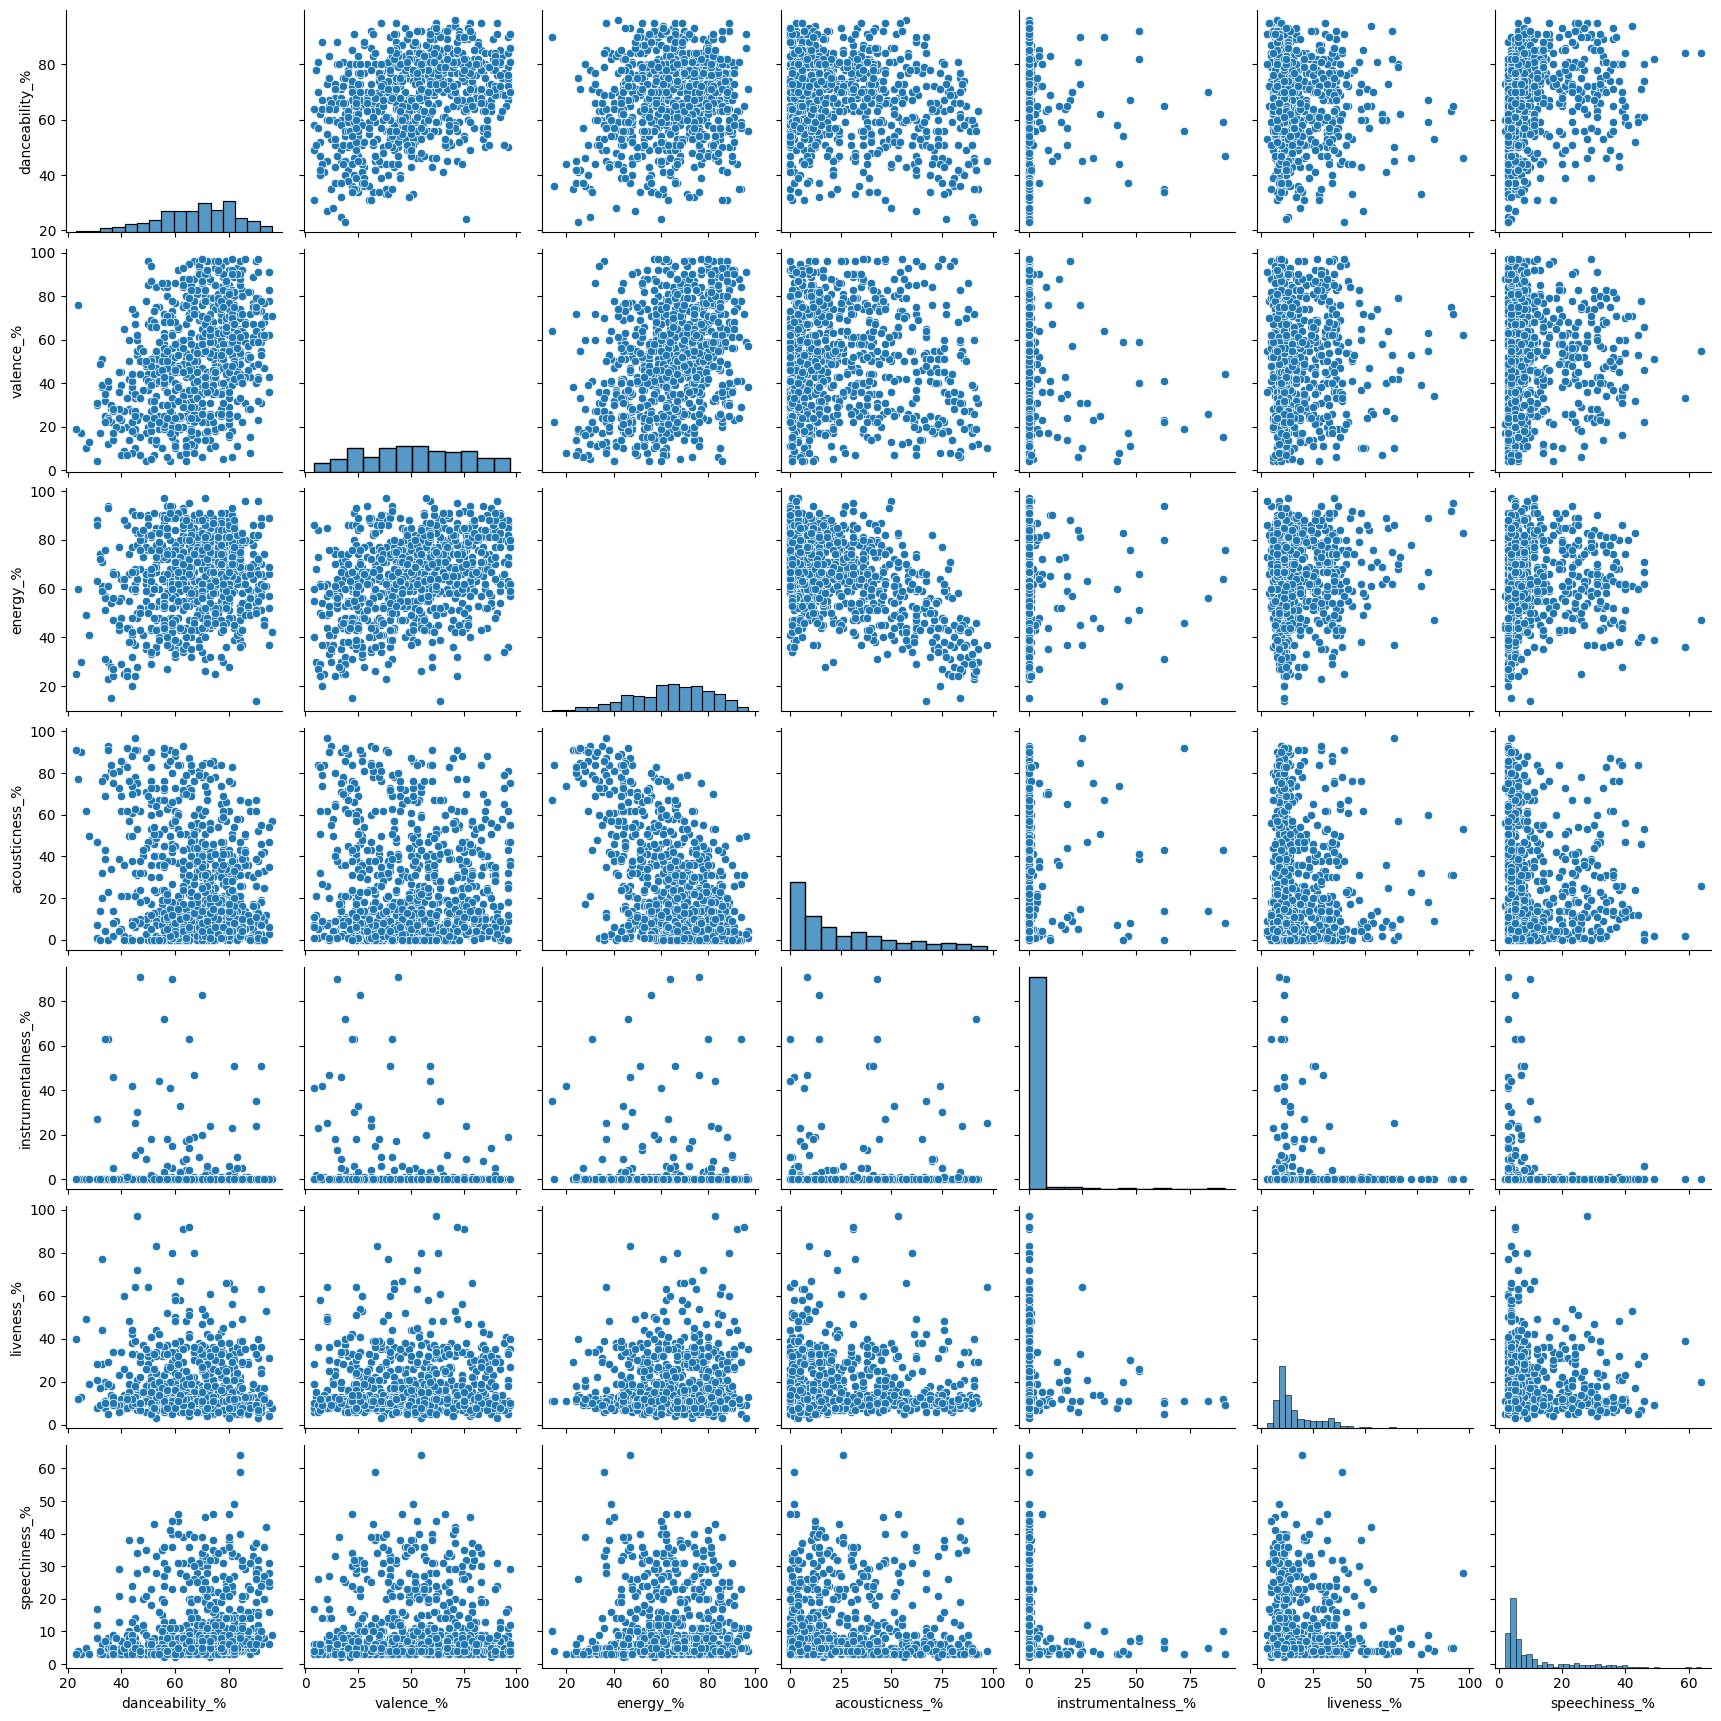

In [ ]:
#Visualize pairwise relationships in DataFrame
sns.pairplot(df_cont)

<Axes: >

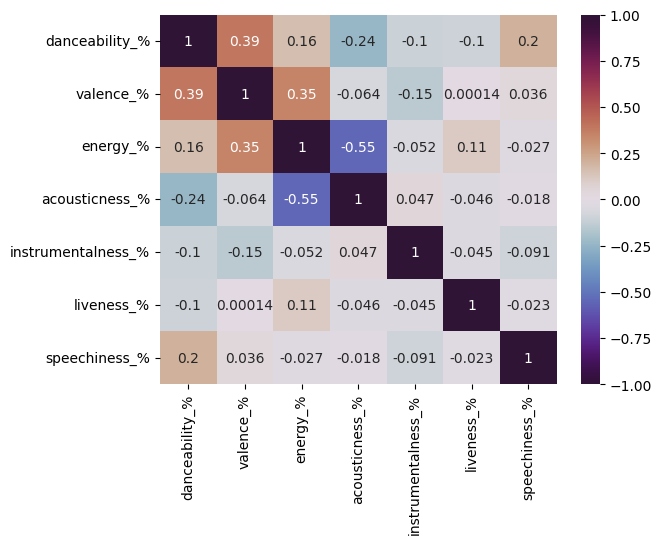

In [ ]:
sns.heatmap(df_cont.corr(), annot=True, cmap='twilight_shifted', vmin=-1, vmax=1)

Surprisingly, there exists a positive correlation (approximately 0.3897) between the 'danceability_%' and 'valence_%' columns in the dataset. This suggests that songs with higher danceability percentages tend to convey more positive emotions, while those with lower danceability percentages exhibit lower valence. The unexpected relationship may be attributed to the inherent connection between energetic, danceable music and positive emotional experiences.



In [ ]:
# Creating a pivot table with 10 mean acousticness_% values for each artist(s)_name
pivot_df=pd.pivot_table(new_df, values='acousticness_%', index='artist(s)_name',aggfunc='mean')
pivot_df.sort_values(by='acousticness_%', ascending=False).head(10)

,acousticness_%
artist(s)_name,
Lord Huron,97.0
"Billie Eilish, Khalid",93.0
John Legend,92.0
Kaifi Khalil,91.0
Dean Martin,91.0
"Bing Crosby, John Scott Trotter & His Orchestra, Ken Darby Singers",91.0
Rihanna,90.0
Michael Bublï¿,89.0
Mahalini,89.0


In [ ]:
#This function defines a custom aggregation to calculate the 99th percentile of a Series, applied to the 'acousticness_%' values per artist in a pivot table.
def custom(ser):
    return ser.quantile(.99)

pd.pivot_table(new_df, values='acousticness_%', index='artist(s)_name',
               aggfunc=['min', 'mean', 'max', custom])

,min,mean,max,custom
,acousticness_%,acousticness_%,acousticness_%,acousticness_%
artist(s)_name,,,,
(G)I-DLE,3,3.5,4,3.99
"21 Savage, Gunna",0,0.0,0,0.00
50 Cent,26,26.0,26,26.00
"A$AP Rocky, Metro Boomin, Roisee",4,4.0,4,4.00
"Abhijay Sharma, Riar Saab",62,62.0,62,62.00
...,...,...,...,...
j-hope,1,1.0,1,1.00
"j-hope, J. Cole",53,53.0,53,53.00


In [ ]:
#This pandas pivot table operation calculates the minimum, mean, maximum, and a custom function (assumed) for 'acousticness_%' values grouped by the 'key' column.
pd.pivot_table(new_df, values='acousticness_%', index='key',
               aggfunc=['min', 'mean', 'max', custom])

,min,mean,max,custom
,acousticness_%,acousticness_%,acousticness_%,acousticness_%
key,,,,
A,0,29.070423,91,91.00
A#,0,26.000000,93,85.44
B,0,23.805195,91,85.68
C#,0,20.513043,91,83.44
D,0,27.243590,97,91.61
D#,1,29.666667,84,80.52
E,0,31.525424,93,92.42
F,0,28.275862,84,77.12


#Exploring Different Plots with Seaborn for different features in the dataset.

<Axes: xlabel='key', ylabel='acousticness_%'>

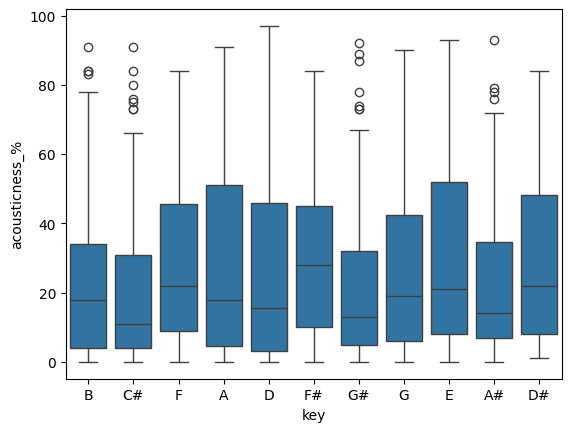

In [ ]:
sns.boxplot(x='key', y='acousticness_%', data=new_df)

<Axes: xlabel='key', ylabel='acousticness_%'>

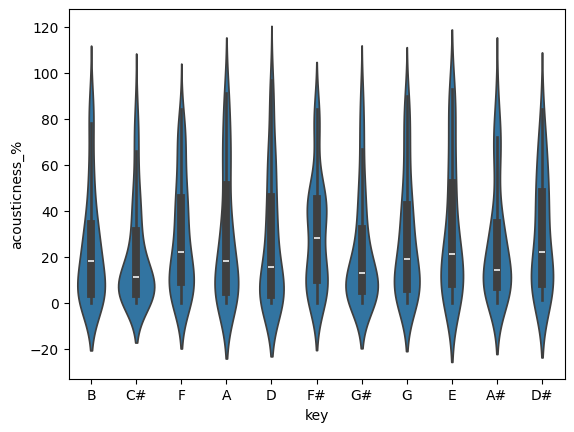

In [ ]:
sns.violinplot(x='key', y='acousticness_%', data=new_df)

<Axes: xlabel='key', ylabel='acousticness_%'>

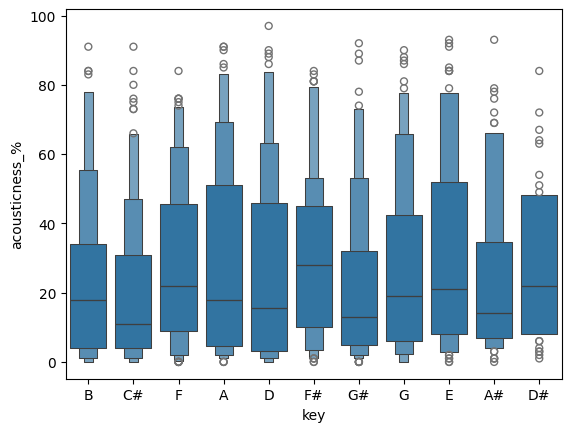

In [ ]:
sns.boxenplot(x='key', y='acousticness_%', data=new_df)

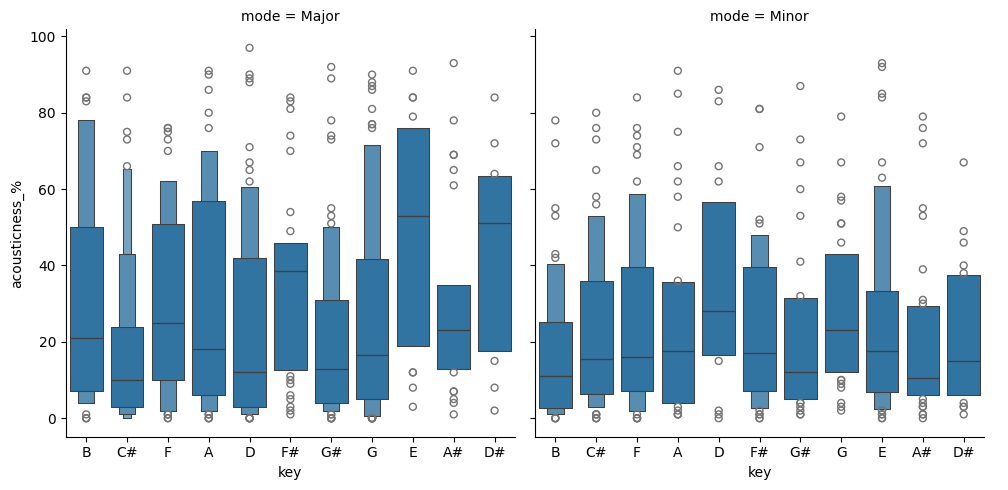

In [ ]:
ax = sns.catplot(x='key', y='acousticness_%', data=new_df, kind='boxen', col='mode', col_wrap=2)

##Customizing one plot using the matplitlib techniques presented in the class.

<ipython-input-74-36ee0456f7a2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='key', y='acousticness_%', data=new_df, ax=ax, palette='pastel')


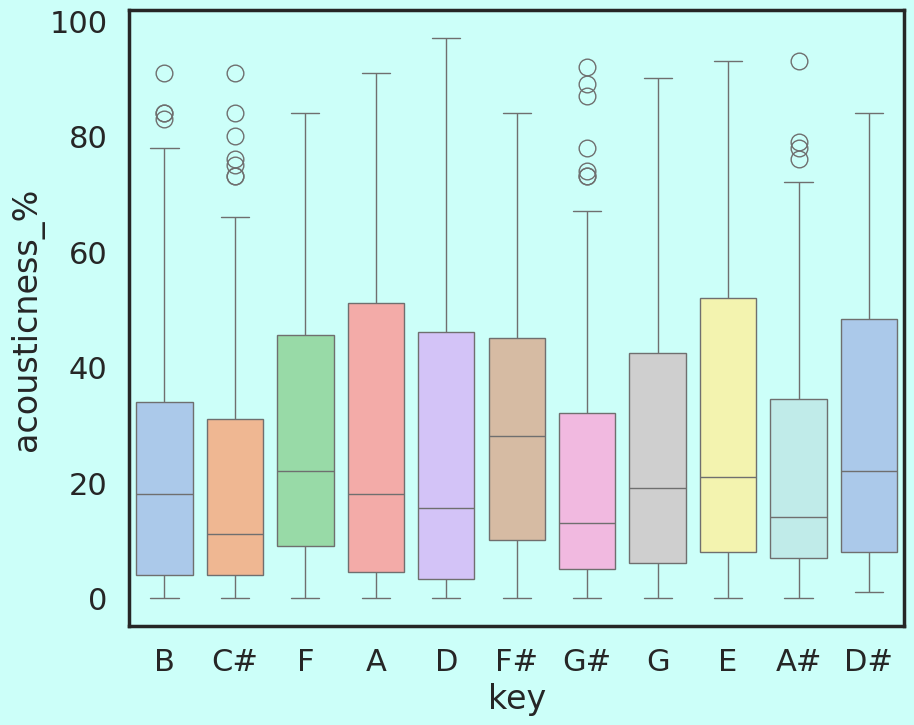

In [ ]:
with sns.color_palette('pastel'):
    with sns.plotting_context('poster'):
        with sns.axes_style('white', {'axes.facecolor': '#CCFFF9'}):
            fig, ax = plt.subplots(figsize=(10, 8))
            # Set the face color for both the axes and the figure
            ax.set_facecolor('#CCFFF9')
            fig.set_facecolor('#CCFFF9')
            # Specify the color palette for the boxplot
            sns.boxplot(x='key', y='acousticness_%', data=new_df, ax=ax, palette='pastel')
            ax.tick_params(axis='x', labelrotation=360)

I modified the letter size in the graph, as I believe larger letters enhance readability. Additionally, I made changes to the graph's colors, including the background colors and the color of each boxplot for every column of data. I employed the pastel color palette to make the graph more visually appealing and to highlight each boxplot distinctly. In the original graph, all the boxplots had the same color, which I found less effective. The adjustments aim to create a more attractive and visually clear representation between the 'key' and 'acousticness_%' columns.



#Machine Learning

#PCA (Principal Component Analysis)

In [ ]:
#PCA
std = preprocessing.StandardScaler()
#std..var
std_X = pd.DataFrame(std.fit_transform(df_cont), columns = df_cont.columns)
std_X

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,0.858909,1.601170,1.157785,0.184257,-0.191380,-0.751377,-0.638975
1,0.245808,0.415057,0.598699,-0.758569,-0.191380,-0.603597,-0.638975
2,-1.116640,-0.813418,-0.705833,-0.365725,-0.191380,0.948084,-0.443160
3,-0.844150,0.287973,0.474458,-0.601432,-0.191380,-0.529708,0.438007
4,-0.162927,-1.194668,0.971423,-0.483578,6.998791,-0.529708,-0.443160
...,...,...,...,...,...,...,...
812,-0.503539,-1.152307,-1.575521,1.205652,-0.191380,-0.751377,-0.736882
813,-1.729741,-1.872447,-2.507329,2.227047,-0.077251,-0.455818,-0.443160
814,0.858909,1.262280,0.163855,-0.876423,-0.191380,-0.751377,-0.443160
815,0.995154,0.669224,0.785061,-0.719285,-0.191380,-0.455818,-0.541067


In [ ]:
std

StandardScaler()

In [ ]:
std_X.std()

danceability_%        1.000613
valence_%             1.000613
energy_%              1.000613
acousticness_%        1.000613
instrumentalness_%    1.000613
liveness_%            1.000613
speechiness_%         1.000613
dtype: float64

In [ ]:
std.var_

array([215.48673611, 557.26765834, 259.13679177, 647.97632021,
        76.77196179, 183.16118768, 104.32029891])

In [ ]:
std_X.mean()

danceability_%       -3.522274e-16
valence_%            -4.348487e-18
energy_%              9.023110e-17
acousticness_%        8.696974e-18
instrumentalness_%    1.195834e-17
liveness_%           -1.304546e-17
speechiness_%        -6.957579e-17
dtype: float64

In [ ]:
std.transform(df_cont)

array([[ 0.85890881,  1.60116976,  1.15778456, ..., -0.19138028,
        -0.75137667, -0.63897471],
       [ 0.24580751,  0.41505663,  0.59869939, ..., -0.19138028,
        -0.60359748, -0.63897471],
       [-1.11663982, -0.81341767, -0.70583267, ..., -0.19138028,
         0.94808397, -0.44315988],
       ...,
       [ 0.85890881,  1.2622803 ,  0.16385537, ..., -0.19138028,
        -0.75137667, -0.44315988],
       [ 0.99515355,  0.66922373,  0.78506111, ..., -0.19138028,
        -0.4558183 , -0.5410673 ],
       [-0.43541616, -0.81341767,  0.16385537, ..., -0.19138028,
        -0.52970789, -0.5410673 ]])

<Axes: >

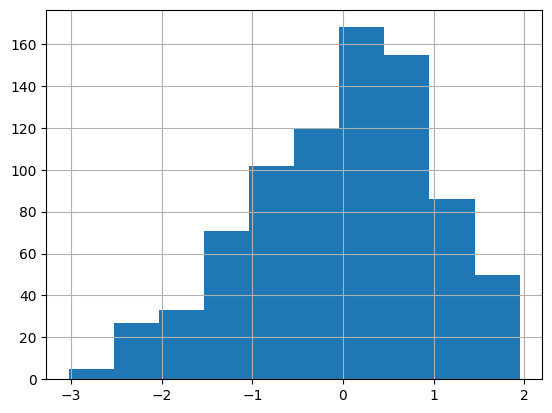

In [ ]:
std_X['danceability_%'].hist()

<Axes: >

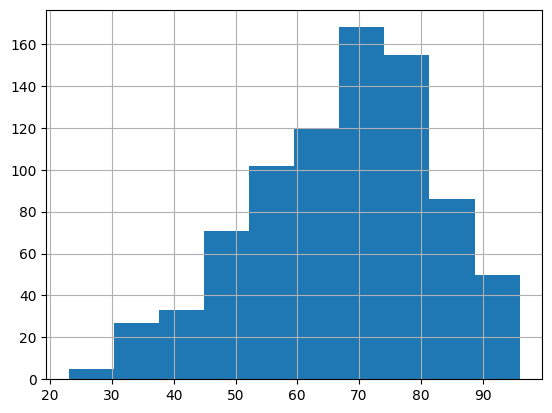

In [ ]:
df_cont['danceability_%'].hist()

In [ ]:
pca = decomposition.PCA()
pca_X = pd.DataFrame(pca.fit_transform(std_X),
                    columns = [f'PC{i+1}' for i in range (df_cont.shape[1])])
pca_X

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-1.586903,-0.381923,0.654970,-1.489071,0.107728,0.438715,0.413336
1,-0.923537,0.345232,0.612517,-0.488467,-0.610364,-0.038350,-0.126134
2,1.060294,1.069469,-0.856127,0.307564,-0.302459,-0.320702,-0.618467
3,-0.368624,0.214793,0.148720,0.317427,-0.592601,1.020347,-0.440721
4,1.268184,2.763470,5.059258,1.774514,3.712794,0.264220,0.496637
...,...,...,...,...,...,...,...
812,2.290340,-0.556042,0.197056,-0.500269,-0.718794,-0.533674,0.126506
813,4.147555,-0.613437,-0.407249,-0.237978,-0.587958,-0.074750,0.048467
814,-1.426294,-0.393877,0.752208,-0.786415,-0.251365,-0.250415,-0.651164
815,-1.479738,0.037739,0.615058,-0.558042,-0.275571,-0.369644,0.125299


In [ ]:
pca.explained_variance_ratio_

array([0.27653478, 0.17976759, 0.14834542, 0.13612876, 0.12277955,
       0.09113773, 0.04530617])

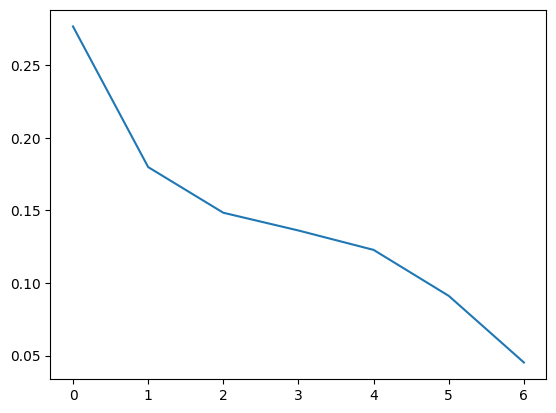

In [ ]:
plt.plot(pca.explained_variance_ratio_)

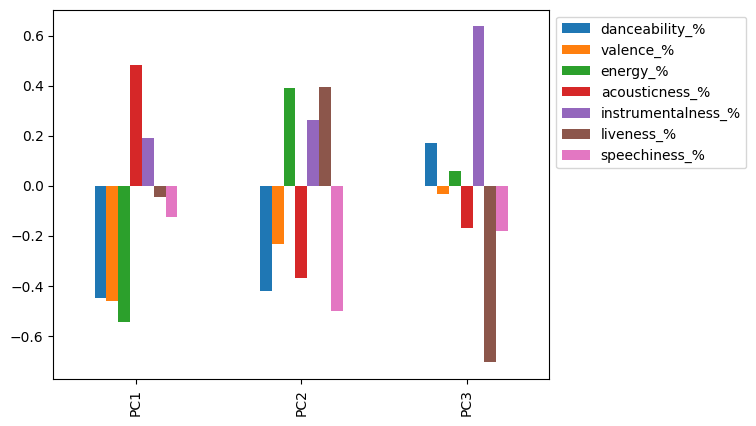

In [ ]:
#components
(pd.DataFrame(pca.components_, columns = df_cont.columns,
              index = [f'PC{i+1}' for i in range(df_cont.shape[1])])
.iloc[:3]
.plot.bar()
.legend(bbox_to_anchor=(1,1))
)

<Axes: xlabel='PC1', ylabel='PC2'>

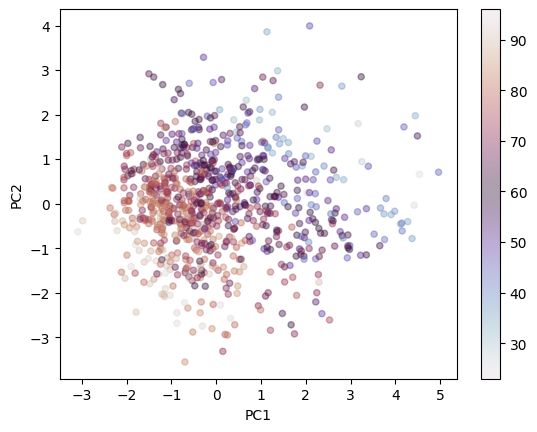

In [ ]:
(pca_X
 #.sample(500, random_state=42)
 #.iloc[:500]
 .plot.scatter(x='PC1', y='PC2',
               alpha=.4,
               #y='PC3',
               #c=df_cont.index.dayofyear,#[:500],
               c=df_cont['danceability_%'],#.iloc[:500],
               #c=df_cont.SNWD,
                #c=df_cont.TMAX,
               #c=df_cont.PRCP,
                #c=df_cont.SNWD,
               #cmap='viridis',
               cmap='twilight'
               #cmap='hsv'
               )
 )

<Axes: xlabel='PC2', ylabel='PC3'>

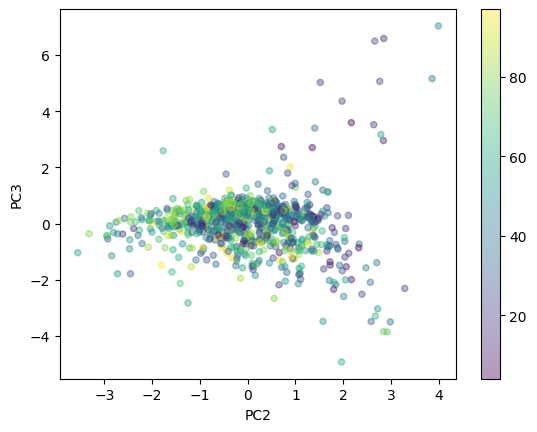

In [ ]:
(pca_X
 .plot.scatter(x='PC2', y='PC3',
               alpha=.4,
               #y='PC3',
               #c=df_cont.index.dayofyear,#[:500],
               c=df_cont['valence_%'],#.iloc[:500],
               #c=df_cont.SNWD,
                #c=df_cont.TMAX,
               #c=df_cont.PRCP,
                #c=df_cont.SNWD,
               cmap='viridis',
               #cmap='twilight'
               #cmap='hsv'
               )
 )

<Axes: xlabel='PC4', ylabel='PC5'>

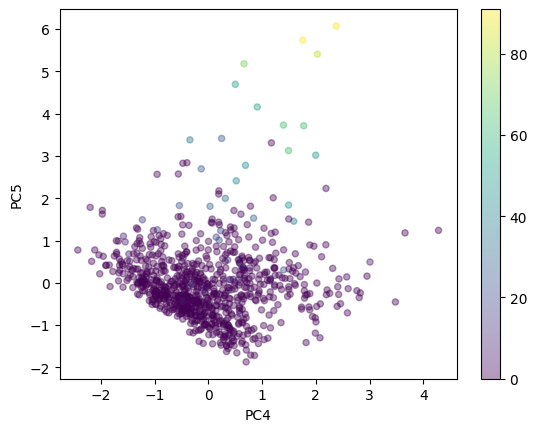

In [ ]:
(pca_X
 .plot.scatter(x='PC4', y='PC5',
               alpha=.4,
               #y='PC3',
               #c=df_cont.index.dayofyear,#[:500],
               c=df_cont['instrumentalness_%'],#.iloc[:500],
               #c=df_cont.SNWD,
                #c=df_cont.TMAX,
               #c=df_cont.PRCP,
                #c=df_cont.SNWD,
               cmap='viridis',
               #cmap='twilight'
               #cmap='hsv'
               )
 )

#Clustering

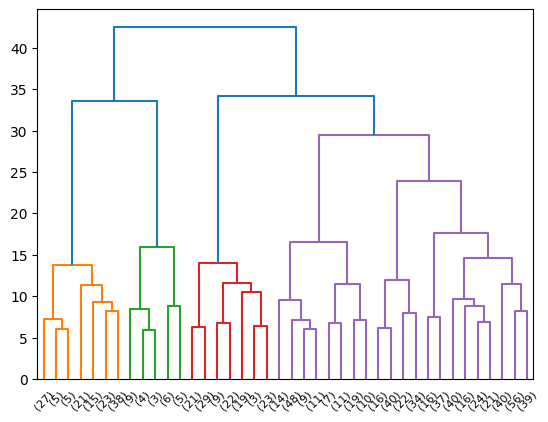

In [ ]:
# Clustering
dend = hierarchy.dendrogram(hierarchy.linkage(std_X, method='ward'),
                            truncate_mode='lastp',
                            p=40
                            )


In [ ]:
agg = cluster.AgglomerativeClustering(n_clusters=4,
                    affinity='euclidean', linkage='ward')
agg.fit(std_X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [ ]:
(df_cont
 .assign(label=agg.labels_)
 .groupby('label')
 .agg(['mean', 'std'])
 .T
 .iloc[4:]
 .style.background_gradient(cmap='RdBu', axis=1)
 )

<Axes: >

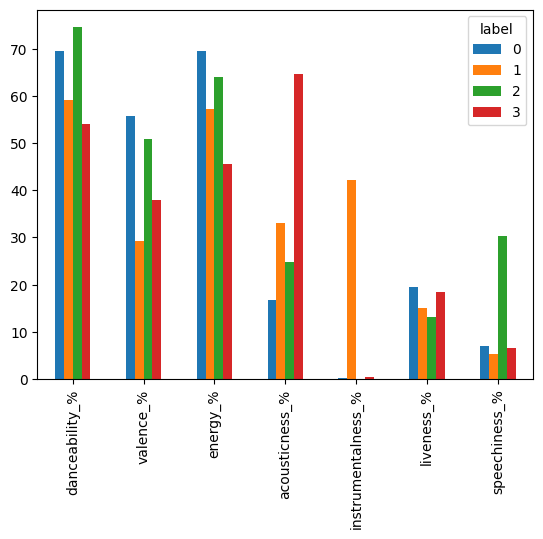

In [ ]:
(df_cont
 .assign(label=agg.labels_)
 .groupby('label')
 ##.agg(['mean', 'std'])
 .mean()
 .T
 .plot.bar()
 )

<Axes: xlabel='PC1', ylabel='PC2'>

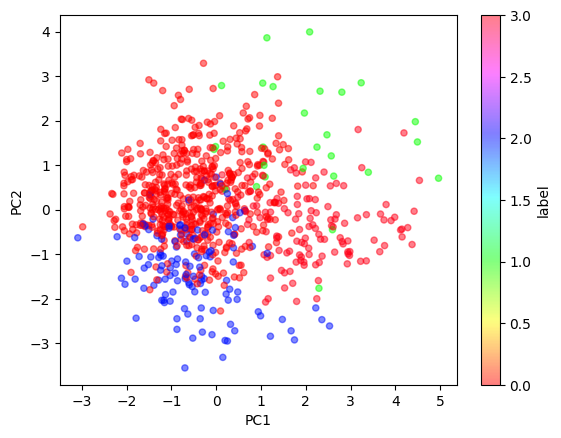

In [ ]:
(pca_X
 .assign(label=agg.labels_)
 .plot.scatter(x='PC1', y='PC2', alpha=.5,
               c='label',
               cmap='hsv'
               #cmap='twilight'
               #cmap='viridis'
               )
 )

<Axes: xlabel='PC5', ylabel='PC6'>

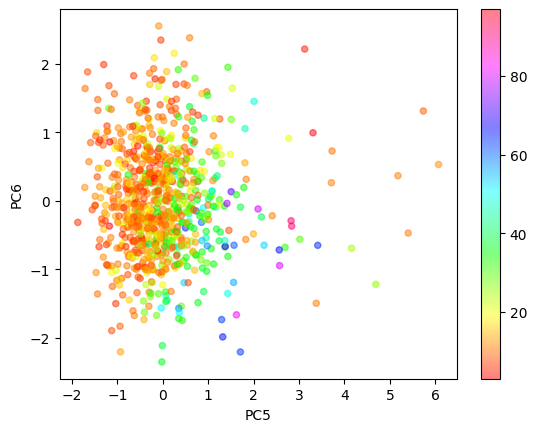

In [ ]:
(pca_X
 .assign(label=agg.labels_)
 .plot.scatter(x='PC5', y='PC6', alpha=.5,
               c=df_cont['liveness_%'],
               cmap='hsv'
               #cmap='twilight'
               #cmap='viridis'
               )
 )

#Principal Component 1 Insights
The exploration of Spotify data provides valuable insights into the intricate world of musical attributes and clustering patterns. As depicted in Principal Component 1 (PC1), the columns 'energy_%,' 'valence_%,' and 'danceability_%' stand out, illustrating a shared variance in energetic, positive, and danceable musical features. This alignment is not surprising, as these attributes often correlate, reflecting the inherent coherence in the Spotify DataSet.

#Cluster Analysis
The exploration delves further into cluster analysis, revealing four distinctive clusters within the Spotify DataSet. Each cluster exhibits unique musical profiles, emphasizing the diversity inherent in the dataset.

**Cluster 0:** Characterized by high energy (69.59%), moderate acousticness (16.66%), and moderate speechiness (7.11%). This cluster captures a balance between energetic and acoustic elements.

**Cluster 1:** Exhibits lower energy (57.15%), higher acousticness (33.11%), and lower speechiness (5.33%). Notably, this cluster features higher instrumentalness (42.148%), suggesting a focus on instrumental aspects.

**Cluster 2:** Stands out with elevated speechiness (30.23%). This cluster places emphasis on vocal elements, distinguishing it from others.

**Cluster 3:** Characterized by lower energy (45.51%) and higher acousticness (64.57%). This cluster presents a subdued yet acoustically prominent musical profile.



#Conclusion
In conclusion, the Python data analysis of the Spotify DataSet, conducted using Pandas, provided a detailed exploration of the relationships among musical attributes, temporal trends and unveiling insightful patterns within the dataset.

Begining with the frequency analysis of the Spotify DataSet reveals that Taylor Swift and Bad Bunny stand out as the most streamed artists. Additionally, the most prevalent musical tone in the dataset is major, indicating a general preference for uplifting and positive compositions. Examining the release years, it is apparent that the majority of songs fall into the year 2022. Furthermore, the analysis identifies May and January as the most common months for song releases, underscoring the popularity of these months for new music on Spotify. In essence, this information provides key insights into the streaming trends, artist preferences, and temporal patterns within the Spotify DataSet.

The unexpected positive correlation between 'danceability_%' and 'valence_%' suggests a connection between energetic, danceable music and positive emotional experiences. The boxplot and histogram analyses of the 'energy_%' column highlight a broad spectrum of energy levels, ranging from almost 0% to nearly 100%, with the majority falling within the 50% to 75% range, this diversity in energy levels signifies a rich variety of energetic qualities among the songs in the dataset, offering valuable insights into the overall dynamics of the music allowing an understanding of the most famous streamed songs of 2023.

As a Data Science and Mathematics student, the use of Pandas as the primary tool underscores the significance of a robust analytical approach, while Scikit-learn as the primary tool to perform machine learning, in this case for PCA and Clustering.
The Principal Component 1 (PC1) analysis reveals the pivotal role played by 'energy_%,' 'valence_%,' and 'danceability_%' in shaping the dataset's variance, aligning with expectations of their inherent coherence. The cluster analysis further unveils four distinctive clusters, each with unique musical profiles, emphasizing the inherent diversity within the dataset.

Therefore, this data analysis not only contributes to a deeper understanding of the Spotify DataSet but also demonstrates the power of Pandas, Seaborn and Matplotlib in extracting meaningful data and visual insights from complex datasets in the area of data science and mathematics. The visualization of Principal Component 1 and the detailed examination of clusters using Scikit-learn enhance my comprehension of the relationships among musical features, which cover the way for future exploration and analysis in the realm of data science.